# WDP-DSX: BlocPower Demo

In [1]:
# The code was removed by DSX for sharing.

# Summary
This is the management summary for the BlocPower analysis. There are two significant findings:
- A group of seven buildings has been identified that are small but exhibit very high kWH/m2 energy consumption
- The correlation of power and gas data to energy consumption per m2 is lower than expected and needs to be discussed with SMEs 

## Location of buildings

Loading required package: httr
Loading required package: RCurl
Loading required package: bitops

Attaching package: ‘RCurl’

The following object is masked from ‘package:SparkR’:

    base64

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=40.690827,-73.819892&zoom=10&size=640x640&scale=2&maptype=terrain&sensor=false


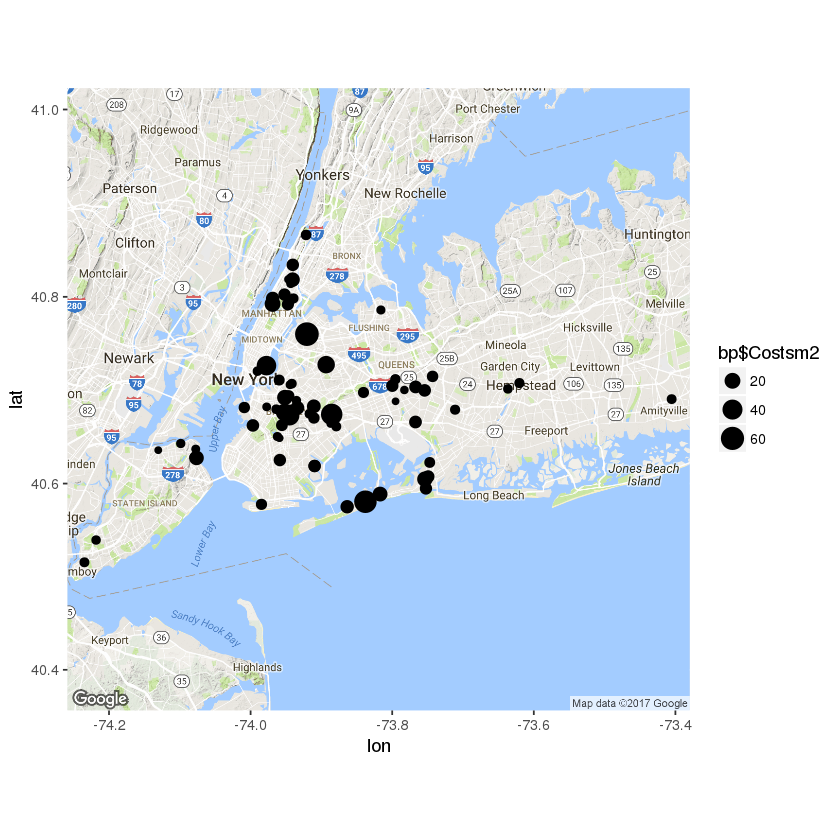

In [2]:
# The code was removed by DSX for sharing.

## Identification of buildings

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


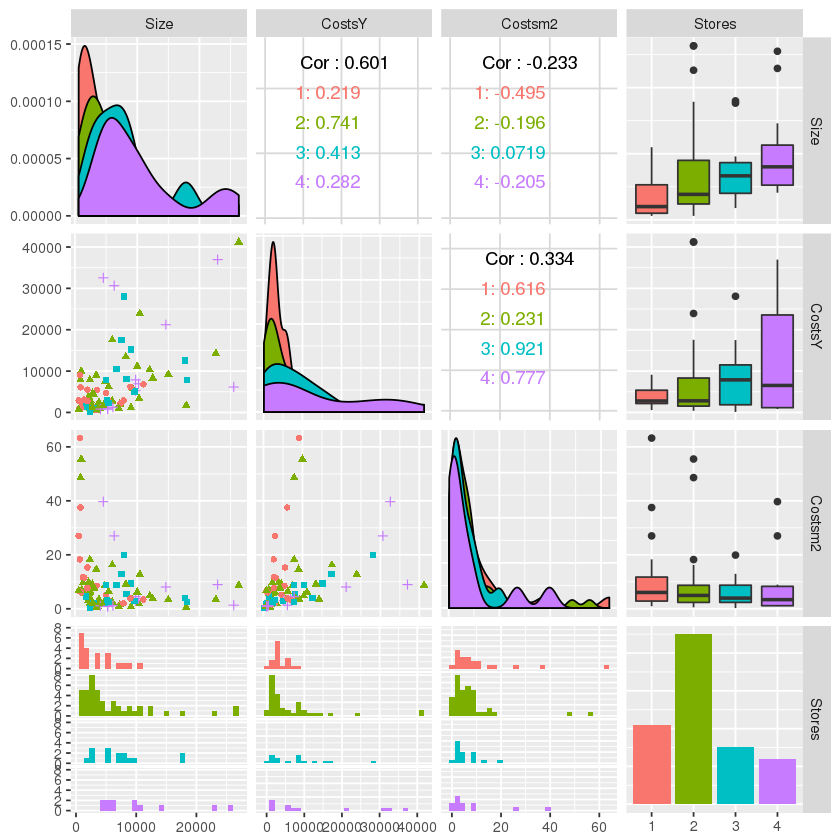

In [3]:
# The code was removed by DSX for sharing.

# Technical Details
## Read Data from .csv on Object Storage
### Insert credentials


In [4]:
# The code was removed by DSX for sharing.

### Create base R data.frame

In [6]:
# The code was removed by DSX for sharing.

In [7]:
os.df <-  read.csv(file = getObjectStorageFileWithCredentials_3015d4633bf74b6687297995308a890f("A1", "BP-Imputed-LogTransformed-Scaled.csv"))
class(os.df)
str(os.df)

[1] "data.frame"

'data.frame':	95 obs. of  22 variables:
 $ ID           : int  1 2 3 4 5 7 8 10 11 12 ...
 $ Property     : Factor w/ 94 levels "4-1_Vision_Education_Media,_LLC_-_NYSERDA_Energy_Assessment_Report",..: 18 3 87 77 80 81 82 88 69 62 ...
 $ Address      : Factor w/ 86 levels "102 Commerce Street",..: 12 78 53 62 59 39 39 82 71 38 ...
 $ Zip          : int  10029 11378 10301 11096 11104 11234 11234 11553 10309 11205 ...
 $ Year         : int  1955 1940 1920 1965 1930 1964 1964 1910 1897 1931 ...
 $ Age          : num  -0.993 -0.397 0.397 -1.39 0 ...
 $ Stores       : num  2.7 -1.35 0 -1.35 1.35 0 0 1.35 0 0 ...
 $ Size         : num  1.099 -2.175 0.187 0 -0.18 ...
 $ Long         : num  -73.9 -73.9 -74.1 -73.7 -73.9 ...
 $ Lat          : num  40.8 40.7 40.6 40.6 40.7 ...
 $ acPlugLoad   : num  0.956 2.235 -1.027 -0.189 0.68 ...
 $ acConsumption: num  -0.108 1.854 -1.555 -0.411 0.166 ...
 $ gasDomestic  : num  -0.00211 2.00006 -0.87475 -1.01482 -0.34319 ...
 $ gasHeating   : num  -0.562 0.48

### Create SparkDataFrame

In [9]:
# The code was removed by DSX for sharing.

In [10]:

os.sdf <- read.df(paste("swift://", "A1", "." , name,"/", "BP-Imputed.csv", sep=""), source = "org.apache.spark.sql.execution.datasources.csv.CSVFileFormat", header = "true")
class(os.sdf)


[1] "SparkDataFrame"
attr(,"package")
[1] "SparkR"

In [11]:
# The code was removed by DSX for sharing.

[1] "SparkDataFrame"
attr(,"package")
[1] "SparkR"

root
 |-- ID: string (nullable = true)
 |-- Property: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Zip: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Stores: integer (nullable = true)
 |-- Size: double (nullable = true)
 |-- Long: double (nullable = true)
 |-- Lat: double (nullable = true)
 |-- acPlugLoad: double (nullable = true)
 |-- acAirCondition: double (nullable = true)
 |-- gasDomestic: double (nullable = true)
 |-- gasHeating: double (nullable = true)
 |-- gasNA: string (nullable = true)
 |-- YearNA: string (nullable = true)
 |-- acPlugEquip1: integer (nullable = true)
 |-- acPlugEquip3: integer (nullable = true)
 |-- kWH: double (nullable = true)
 |-- CostsY: double (nullable = true)
 |-- Costsm2: double (nullable = true)
 |-- Efficiency: double (nullable = true)
 |-- bw: string (nullable = true)


NULL

ID,Property,Address,Zip,Year,Age,Stores,Size,Long,Lat,...,gasHeating,gasNA,YearNA,acPlugEquip1,acPlugEquip3,kWH,CostsY,Costsm2,Efficiency,bw
1,ChurchofStCeciliaReport,125 East 105th Street,10029,1955,62,4,14600,-73.94733,40.79192,...,0.36619324,FALSE,FALSE,1,2,117870,21216.60,8.073288,0.12386528,FALSE
2,69thLaneStudio,69-71 Grand Avenue,11378,1940,77,1,600,-73.89331,40.72744,...,0.02961357,TRUE,FALSE,1,0,16207,2917.26,27.011666,0.03702104,FALSE


## Read Data from dashDB table

In [12]:
# The code was removed by DSX for sharing.

In [13]:
# The code was removed by DSX for sharing.

Loading required package: RODBC
Loading required package: Matrix
Loading required package: arules

Attaching package: ‘arules’

The following objects are masked from ‘package:SparkR’:

    decode, encode, size

The following objects are masked from ‘package:base’:

    abbreviate, write



In [12]:
head(idaShowTables(),4)

Schema,Name,Owner,Type
DASH015537,AFD_AP_TAIL,DASH015537,T
DASH015537,AIRLINE_FLIGHT_DELAYS_2000,DASH015537,T
DASH015537,AIRPORTS,DASH015537,T
DASH015537,AVL_DIRLIST,DASH015537,T


### Create base R data.frame

In [14]:
dash.df <- as.data.frame(ida.data.frame('DASH015537.BLOCPOWER_IMPUTED'))
class(dash.df)
str(dash.df)

[1] "data.frame"

'data.frame':	93 obs. of  23 variables:
 $ ID            : int  1 2 3 4 7 8 10 11 12 13 ...
 $ Property      : chr  "ChurchofStCeciliaReport" "69thLaneStudio" "UnitarianChurchofStatenIsland" "SSolowayandSonsPIPPrinting" ...
 $ Address       : chr  "125 East 105th Street" "69-71 Grand Avenue" "312 Fillmore St" "421 Doughty Blvd" ...
 $ Zip           : int  10029 11378 10301 11096 11234 11234 11553 10309 11205 10301 ...
 $ Year          : int  1955 1940 1920 1965 1964 1964 1910 1897 1931 1931 ...
 $ Age           : int  62 77 97 52 53 53 107 120 86 86 ...
 $ Stores        : int  4 1 2 1 2 2 3 2 2 1 ...
 $ Size          : int  14600 600 6000 5000 26318 26318 3024 3800 2400 3128 ...
 $ Long          : chr  "-73.9473260" "-73.8933110" "-74.0986983" "-73.7469957" ...
 $ Lat           : chr  "40.7919189" "40.7274352" "40.6429808" "40.6226744" ...
 $ acPlugLoad    : chr  "11.651405960" "32.769884380" "2.345049272" "4.618817159" ...
 $ acAirCondition: chr  "0.983531348" "5.008371873" "0.2961338

### Create SparkDataFrame

In [15]:
# The code was removed by DSX for sharing.

In [16]:
dash.sdf <- read.jdbc(url = properties.c5f6bc69632545128f90dd6dfee9f8a7$jdbcurl, table = "DASH015537.AIRPORTS", user = properties.c5f6bc69632545128f90dd6dfee9f8a7$username, password = properties.c5f6bc69632545128f90dd6dfee9f8a7$password)
class(dash.sdf)
head(dash.sdf,2)

[1] "SparkDataFrame"
attr(,"package")
[1] "SparkR"

iata,airport,city,state,country,lat,long
MKO,Davis,Muskogee,OK,USA,35.65773,-95.36165
MKT,Mankato Regional,Mankato,MN,USA,44.22165,-93.91874


### Create ida.data.frame

In [17]:
dash.idf <- ida.data.frame('DASH015537.BLOCPOWER_IMPUTED')
class(dash.idf)
head(dash.idf,2)

[1] "ida.data.frame"
attr(,"package")
[1] "ibmdbR"

ID,Property,Address,Zip,Year,Age,Stores,Size,Long,Lat,...,gasHeating,gasNA,YearNA,acPlugEquip1,acPlugEquip3,kWH,CostsY,Costsm2,Efficiency,bw
1,ChurchofStCeciliaReport,125 East 105th Street,10029,1955,62,4,14600,-73.9473260,40.7919189,...,0.366193236,FALSE,FALSE,1,2,117869.9999000,21216.60,8.073287664383560,0.123865275408387,FALSE
2,69thLaneStudio,69-71 Grand Avenue,11378,1940,77,1,600,-73.8933110,40.7274352,...,0.029613568,TRUE,FALSE,1,0,16206.9998200,2917.26,27.011666366666700,0.0370210407023994,FALSE


In [17]:
library(ggplot2)
library(ggmap)
library(GGally)
library(ggrepel)

In [18]:
loadedNamespaces()

[1] "pbdZMQ"       "repr"         "reshape2"     "ibmdbR"       "lattice"     
 [6] "colorspace"   "grDevices"    "SparkR"       "sp"           "RColorBrewer"
[11] "uuid"         "jpeg"         "plyr"         "rpart.plot"   "stringr"     
[16] "projectnbR"   "munsell"      "gtable"       "RgoogleMaps"  "mapproj"     
[21] "evaluate"     "labeling"     "GGally"       "curl"         "proto"       
[26] "IRdisplay"    "methods"      "Rcpp"         "geosphere"    "scales"      
[31] "IRkernel"     "jsonlite"     "rjson"        "ggplot2"      "stats"       
[36] "datasets"     "graphics"     "png"          "digest"       "stringi"     
[41] "ggrepel"      "RJSONIO"      "grid"         "tools"        "bitops"      
[46] "magrittr"     "maps"         "arules"       "lazyeval"     "RCurl"       
[51] "tibble"       "crayon"       "MASS"         "RODBC"        "Matrix"      
[56] "utils"        "assertthat"   "base"         "reshape"      "httr"        
[61] "rpart"        "R6"           "ggmap"

# BlocPower DataSet
##  Power consumption of buildings in NY

In [19]:
os.df <-  read.csv(file = getObjectStorageFileWithCredentials_3015d4633bf74b6687297995308a890f("A1", "BP-Imputed.csv"))
class(os.df)
str(os.df)

[1] "data.frame"

'data.frame':	93 obs. of  23 variables:
 $ ID            : int  1 2 3 4 7 8 10 11 12 13 ...
 $ Property      : Factor w/ 92 levels "4-1_Vision_Education_Media,_LLC_-_NYSERDA_Energy_Assessment_Report",..: 17 3 85 76 79 80 86 67 60 12 ...
 $ Address       : Factor w/ 84 levels "102 Commerce Street",..: 12 76 53 60 40 40 80 69 39 65 ...
 $ Zip           : int  10029 11378 10301 11096 11234 11234 11553 10309 11205 10301 ...
 $ Year          : int  1955 1940 1920 1965 1964 1964 1910 1897 1931 1931 ...
 $ Age           : int  62 77 97 52 53 53 107 120 86 86 ...
 $ Stores        : int  4 1 2 1 2 2 3 2 2 1 ...
 $ Size          : int  14600 600 6000 5000 26318 26318 3024 3800 2400 3128 ...
 $ Long          : num  -73.9 -73.9 -74.1 -73.7 -73.9 ...
 $ Lat           : num  40.8 40.7 40.6 40.6 40.6 ...
 $ acPlugLoad    : num  11.65 32.77 2.35 4.62 7.11 ...
 $ acAirCondition: num  0.984 5.008 0.296 0.765 1.863 ...
 $ gasDomestic   : num  0.0962 0.1858 0.0327 0.0275 0.0292 ...
 $ gasHeating    : num 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


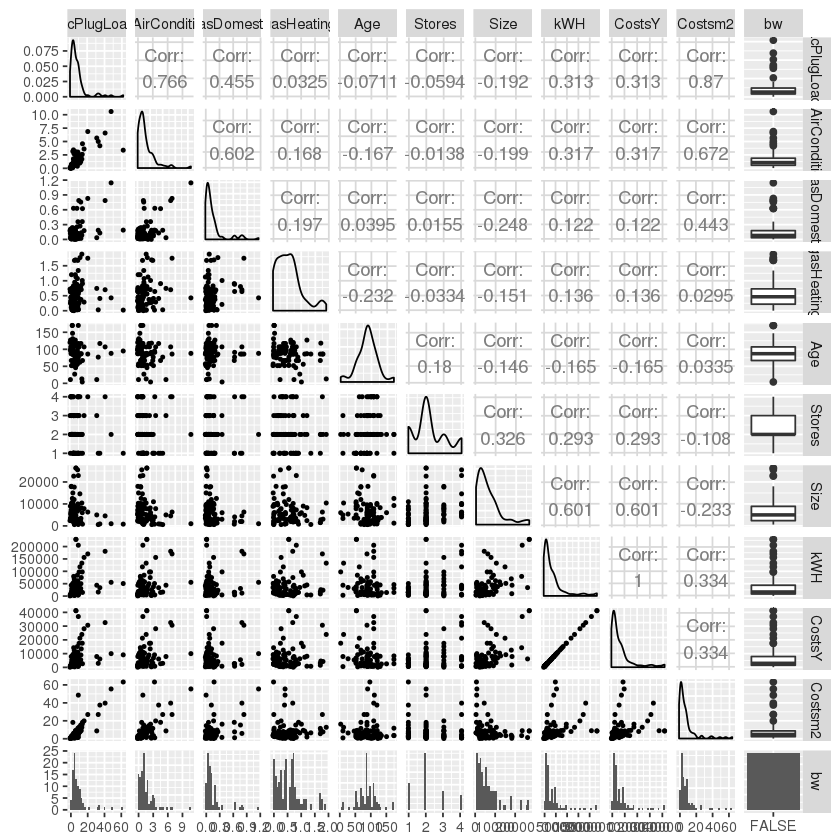

In [20]:
bpc <- c("acPlugLoad", "acAirCondition", "gasDomestic", "gasHeating", "Age", "Stores", "Size", "kWH", "CostsY", "Costsm2")
os.df$bw <- factor(os.df$bw)
ggpairs(os.df, columns=c(bpc,"bw"), lower = list(continuous = wrap("points", size=.75, col="black")))

# Supervised Learning: Predictive Model for Energy Costs per m2
## Machine Learning with base R: Linear Model with lm()

In [21]:
bpc <- c("acPlugLoad", "acAirCondition", "gasDomestic", "gasHeating", "acPlugEquip1", "acPlugEquip3", "Size", "Costsm2")
os.df.lm <- os.df[,bpc]
lm <- lm(Costsm2 ~ ., data=os.df.lm)
summary(lm)


Call:
lm(formula = Costsm2 ~ ., data = os.df.lm)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.271  -1.740  -0.304   1.122  38.515 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.9049861  1.3986012   0.647    0.519    
acPlugLoad      0.9635350  0.0954772  10.092 3.36e-16 ***
acAirCondition -0.1632349  0.6194946  -0.263    0.793    
gasDomestic     2.8473395  3.6689884   0.776    0.440    
gasHeating     -0.5334845  1.4100347  -0.378    0.706    
acPlugEquip1    0.0297392  0.1584253   0.188    0.852    
acPlugEquip3    0.1351169  0.2934119   0.461    0.646    
Size           -0.0001576  0.0001229  -1.283    0.203    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.714 on 85 degrees of freedom
Multiple R-squared:  0.7644,	Adjusted R-squared:  0.745 
F-statistic:  39.4 on 7 and 85 DF,  p-value: < 2.2e-16


### Eliminate non-significant predictors

In [22]:
lms <- step(lm, trace=0)
summary(lms)


Call:
lm(formula = Costsm2 ~ acPlugLoad, data = os.df.lm)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.974  -1.243   0.071   0.905  38.922 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.08154    0.76799  -0.106    0.916    
acPlugLoad   0.99167    0.05896  16.819   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.614 on 91 degrees of freedom
Multiple R-squared:  0.7566,	Adjusted R-squared:  0.7539 
F-statistic: 282.9 on 1 and 91 DF,  p-value: < 2.2e-16


### Check Model

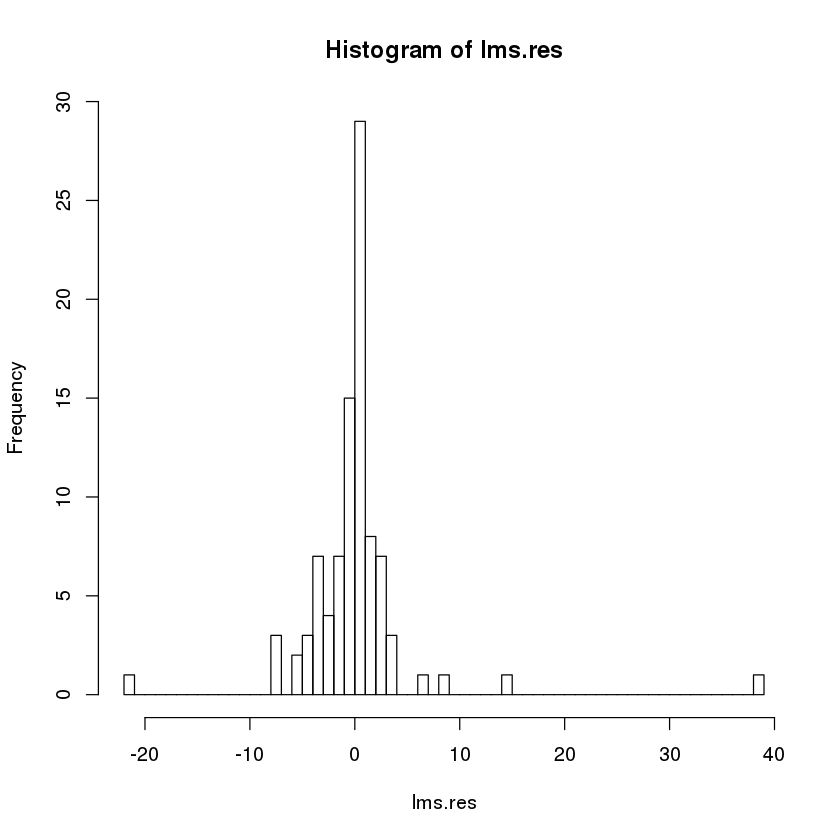

In [23]:
# check model
lms.res <-residuals(lms)
hist(lms.res, breaks=50)
#plot(lms.res); grid()
# plot(ecdf(lms.res)); grid()

## Machine Learning with Spark: Linear Model with SparkR::glm()

In [24]:
bpc <- c("acPlugLoad", "acAirCondition", "gasDomestic", "gasHeating", "acPlugEquip1", "acPlugEquip3", "Size", "Costsm2")
os.sdf.lm <- os.sdf[,bpc]
glm <- spark.glm(data=os.sdf.lm, formula = Costsm2~.)
SparkR::summary(glm)



Deviance Residuals: 
(Note: These are approximate quantiles with relative error <= 0.01)
    Min       1Q   Median       3Q      Max  
-20.271   -1.740   -0.304    1.122   38.515  

Coefficients:
                Estimate     Std. Error  t value   Pr(>|t|)  
(Intercept)     0.90499      1.3986      0.64707   0.51933   
acPlugLoad      0.96353      0.095477    10.092    4.4409e-16
acAirCondition  -0.16323     0.61949     -0.2635   0.79281   
gasDomestic     2.8473       3.669       0.77606   0.43987   
gasHeating      -0.53348     1.41        -0.37835  0.70612   
acPlugEquip1    0.029739     0.15843     0.18772   0.85155   
acPlugEquip3    0.13512      0.29341     0.4605    0.64633   
Size            -0.00015764  0.00012289  -1.2828   0.20303   

(Dispersion parameter for gaussian family taken to be 32.65506)

    Null deviance: 11782.9  on 92  degrees of freedom
Residual deviance:  2775.7  on 85  degrees of freedom
AIC: 597.8

Number of Fisher Scoring iterations: 1


# Unsupervised Learning
## Machine Learning with Spark: Clustering with SparkR::kmeans
### Create Cluster Model

In [25]:
# Run kmeans Model on Spark Cluster
model <- spark.kmeans(os.sdf, formula = ~ acPlugLoad+acAirCondition+gasDomestic+gasHeating+acPlugEquip1+acPlugEquip3+Size, k = 3, initMode = "random")
class(model)
SparkR::summary(model)


[1] "KMeansModel"
attr(,"package")
[1] "SparkR"

$k
[1] 3

$coefficients
  acPlugLoad acAirCondition gasDomestic gasHeating acPlugEquip1 acPlugEquip3
1 6.147009   0.8818161      0.05137949  0.3520474  6.3          4.6         
2 6.544804   1.359011       0.1256095   0.5503224  3.758621     2.586207    
3 9.978133   1.844489       0.1881812   0.5887301  2.777778     1.444444    
  Size    
1 20681.2 
2 8470.448
3 2812.296

$size
$size[[1]]
[1] 10

$size[[2]]
[1] 29

$size[[3]]
[1] 54


$cluster
SparkDataFrame[prediction:int]

$is.loaded
[1] FALSE


### Fit Cluster Model

In [26]:
fitted <- SparkR::predict(model, os.sdf)
df.kmeans.fitted <- SparkR::as.data.frame(fitted)
#str(bp.sdf.kmeans.fitted)

### Visualize results of clustering

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


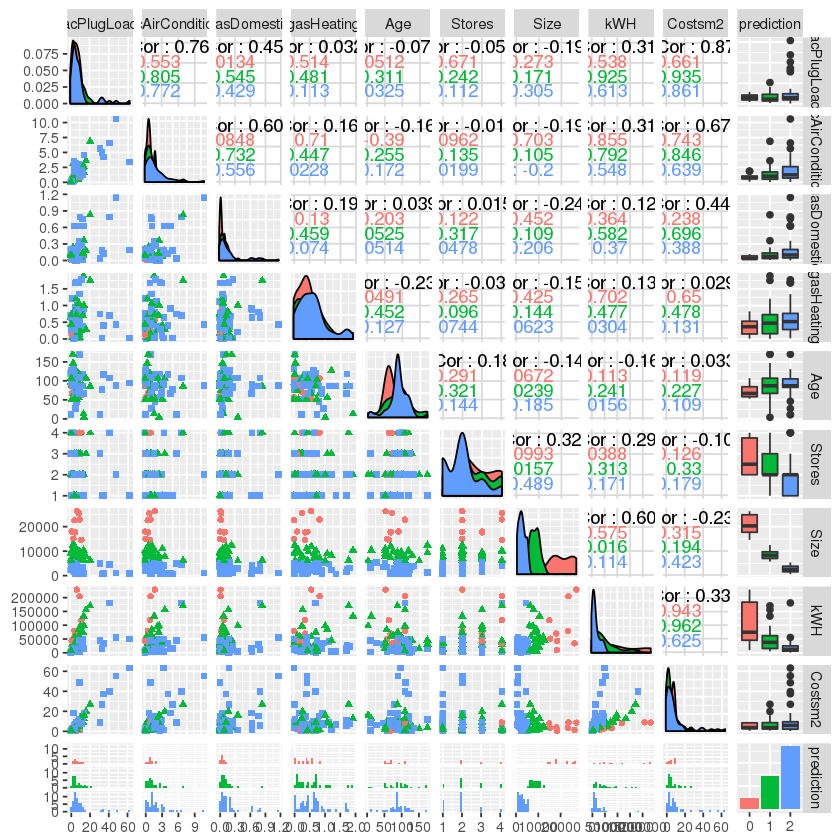

In [27]:
bpc <- c("acPlugLoad", "acAirCondition", "gasDomestic", "gasHeating", "Age", "Stores", "Size", "kWH", "Costsm2", "prediction")
df.kmeans.fitted$prediction <- as.factor(df.kmeans.fitted$prediction)
ggpairs(df.kmeans.fitted, columns=bpc, aes(col=prediction, shape=prediction), lower = list(continuous = wrap("points", size=1.5)))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


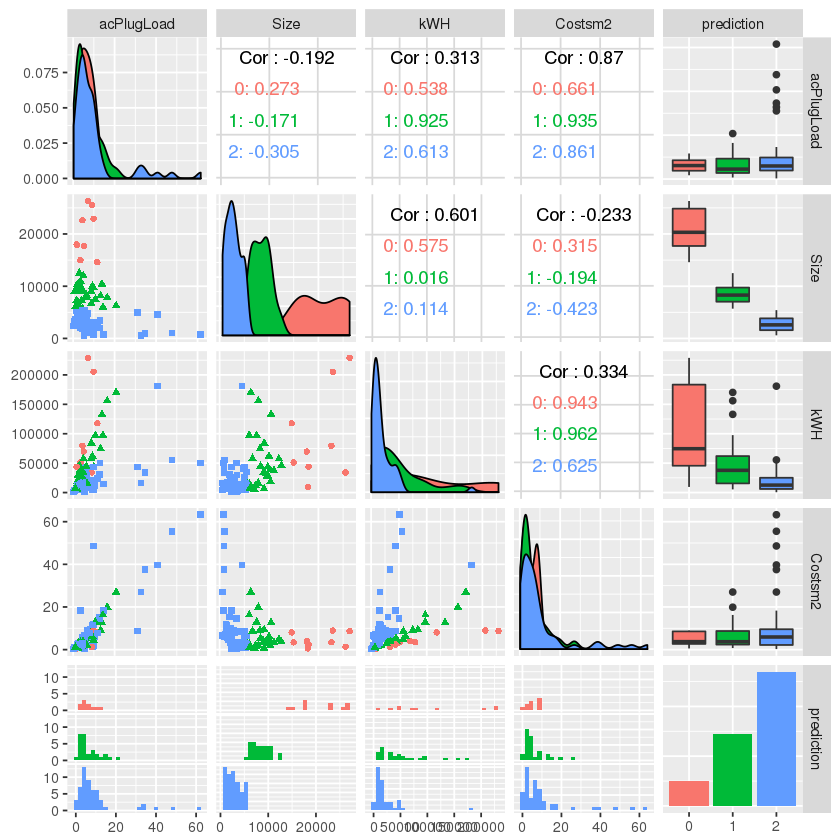

In [28]:
bpc <- c("acPlugLoad", "Size", "kWH", "Costsm2", "prediction")
ggpairs(df.kmeans.fitted, columns=bpc, aes(col=prediction, shape=prediction), lower = list(continuous = wrap("points", size=1.5)))

# Summary

## Map of Buildings indicating Energy Costs per m2

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=40.690827,-73.819892&zoom=10&size=640x640&scale=2&maptype=terrain&sensor=false


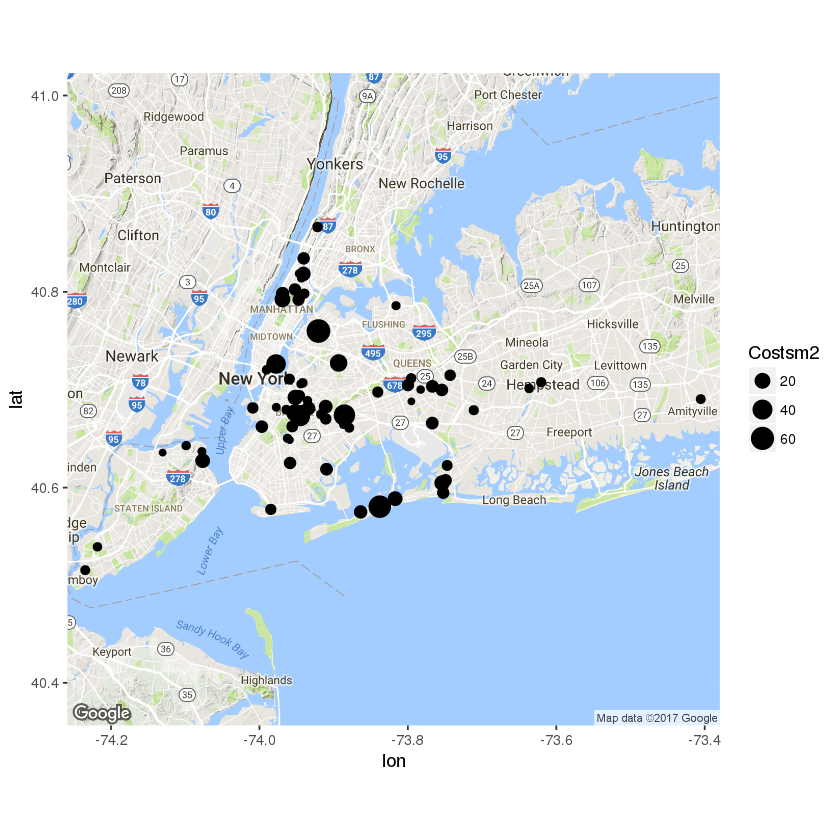

In [29]:
c.Lat <- (max(os.df$Lat)-min(os.df$Lat))/2 + min(os.df$Lat)
c.Long <- (max(os.df$Long)-min(os.df$Long))/2 + min(os.df$Long)

p <- ggmap(get_googlemap(center=c(c.Long, c.Lat), zoom=10))
p <- p +  geom_point(data=os.df, aes(x = Long, y = Lat, size=Costsm2))
p

## Power consumption anomalies

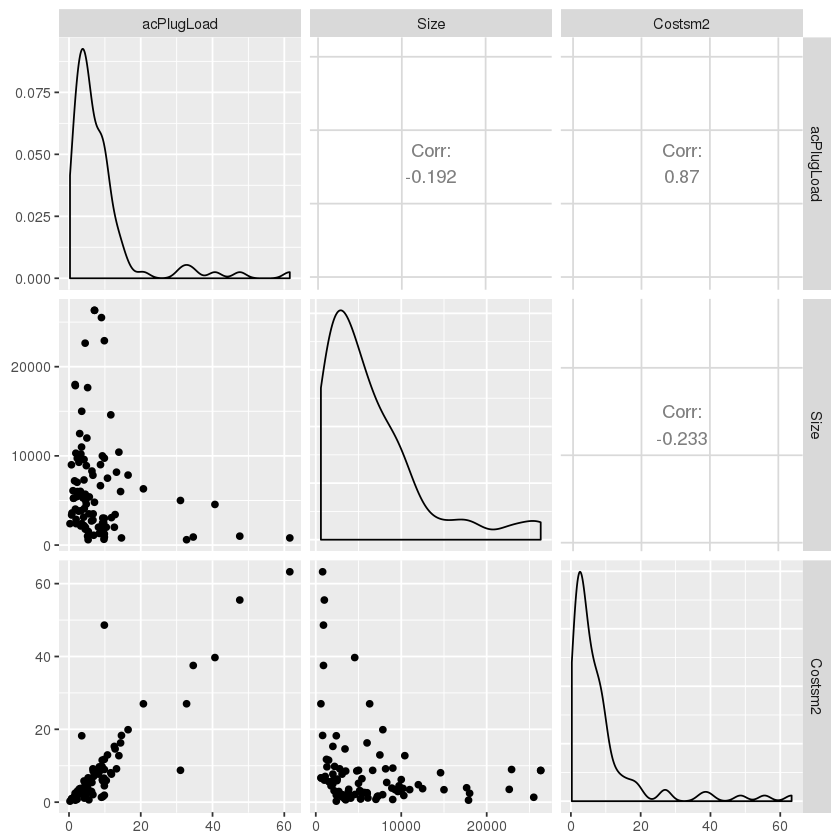

In [30]:
bpc <- c("acPlugLoad", "Size", "Costsm2")
ggpairs(os.df, columns=bpc,  lower = list(continuous = wrap("points", size=1.5)))